In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [122]:
stock_data = yf.download('TSLA')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [123]:
stock_data = stock_data.reset_index()
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [124]:
stock_data = stock_data.drop(['Date', 'Adj Close'], axis = 1)
stock_data.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


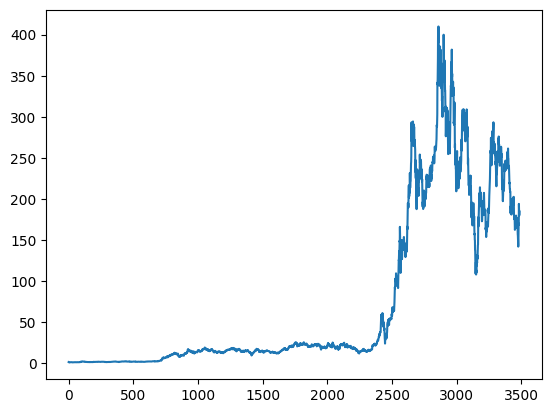

In [125]:
plt.plot(stock_data.Close)

In [126]:
moving_average_100 = stock_data.Close.rolling(100).mean()
moving_average_100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3482    197.9668
3483    197.3730
3484    196.7467
3485    196.1202
3486    195.5704
Name: Close, Length: 3487, dtype: float64

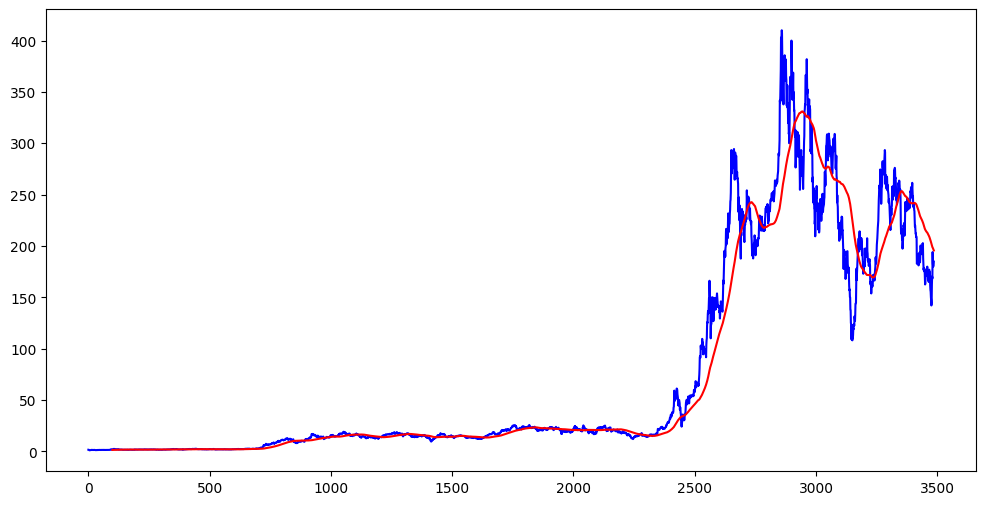

In [127]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.Close, 'b')
plt.plot(moving_average_100, 'r')

In [128]:
moving_average_200 = stock_data.Close.rolling(200).mean()
moving_average_200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3482    221.19310
3483    220.64115
3484    220.07450
3485    219.52415
3486    219.13345
Name: Close, Length: 3487, dtype: float64

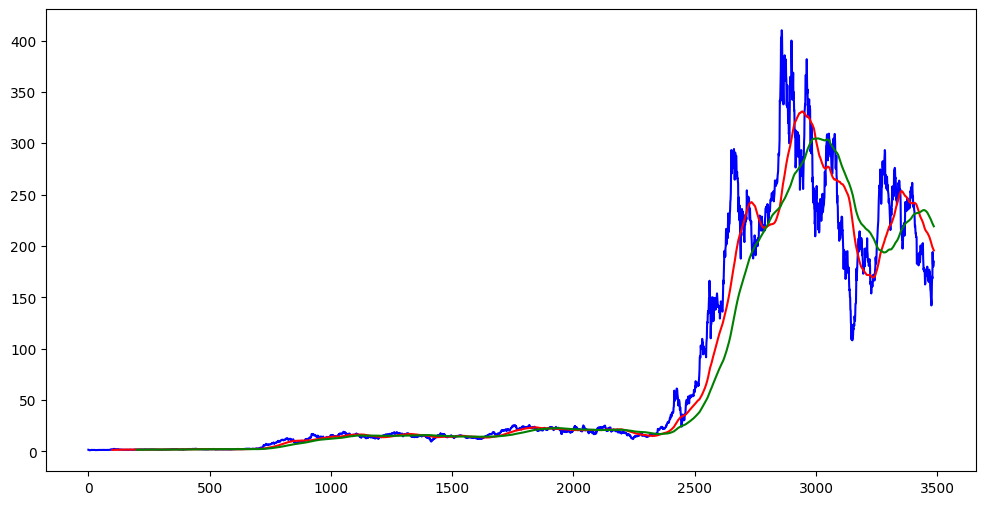

In [129]:
plt.figure(figsize=(12,6))
plt.plot(stock_data.Close, 'b')
plt.plot(moving_average_100, 'r')
plt.plot(moving_average_200, 'g')

In [130]:
stock_data.shape

(3487, 5)

In [131]:
# split data into train and test data
stock_data_training = pd.DataFrame(stock_data['Close'][0:int(len(stock_data)*0.70)])
stock_data_test = pd.DataFrame(stock_data['Close'][int(len(stock_data)*0.70):int(len(stock_data))])

print(stock_data_training.shape)
print(stock_data_test.shape)

(2440, 1)
(1047, 1)


In [134]:
# scalling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [135]:
stock_data_training_array = scaler.fit_transform(stock_data_training)
stock_data_training_array.shape

(2440, 1)

In [136]:
# stock_data_test_array = scaler.fit_transform(stock_data_test)
# stock_data_test_array.shape

In [137]:
x_train = []
y_train = []

for i in range(100, stock_data_training_array.shape[0]):
    x_train.append(stock_data_training_array[i-100:i])
    y_train.append(stock_data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [138]:
x_train.shape

(2340, 100, 1)

## Model Training

In [139]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [140]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mihir\OneDrive\Documents\SEM_6\AI\project\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [142]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - loss: 0.0212
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0032
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0030
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0026
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0028
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0024
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0020
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0018
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0023
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0019
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0017
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0021
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.0016
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0016
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/ste

In [37]:
model.save('stock_prediction_ANN_V2.h5')

In [144]:
stock_data_test.head()
print(type(stock_data_test))

<class 'pandas.core.frame.DataFrame'>


In [145]:
past_100_days = stock_data_training.tail(100)
past_100_days

,Close
2340,17.192667
2341,17.316668
2342,17.464666
2343,17.129999
2344,16.900000
...,...
2435,49.700668
2436,49.966667
2437,48.302666
2438,46.898666


In [146]:
print(stock_data_test.columns)
print(past_100_days.columns)

Index(['Close'], dtype='object')
Index(['Close'], dtype='object')


In [147]:
final_df = pd.concat([past_100_days, stock_data_test], ignore_index=True)
final_df

,Close
0,17.192667
1,17.316668
2,17.464666
3,17.129999
4,16.900000
...,...
1142,183.279999
1143,179.990005
1144,180.009995
1145,181.190002


In [148]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00074457],
       [0.00106003],
       [0.00143656],
       ...,
       [0.41496424],
       [0.41796627],
       [0.4270486 ]])

In [149]:
input_data.shape

(1147, 1)

In [150]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [151]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((1047, 100, 1), (1047,))

In [152]:
y_prediction = model.predict(x_test)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [153]:
y_prediction.shape

(1047, 1)

In [102]:
y_test

array([0.06645636, 0.06457374, 0.05207724, ..., 0.41496424, 0.41796627,
       0.4270486 ])

In [154]:
y_prediction

array([[0.10551496],
       [0.10610723],
       [0.10640539],
       ...,
       [0.3567411 ],
       [0.3716653 ],
       [0.3858697 ]], dtype=float32)

In [155]:
scaler.scale_

array([0.00254408])

In [156]:
scale_factore = 1/0.00254408
y_pred = y_prediction*scale_factore
y_test = y_test*scale_factore

# y_pred_flat = y_pred.flatten()

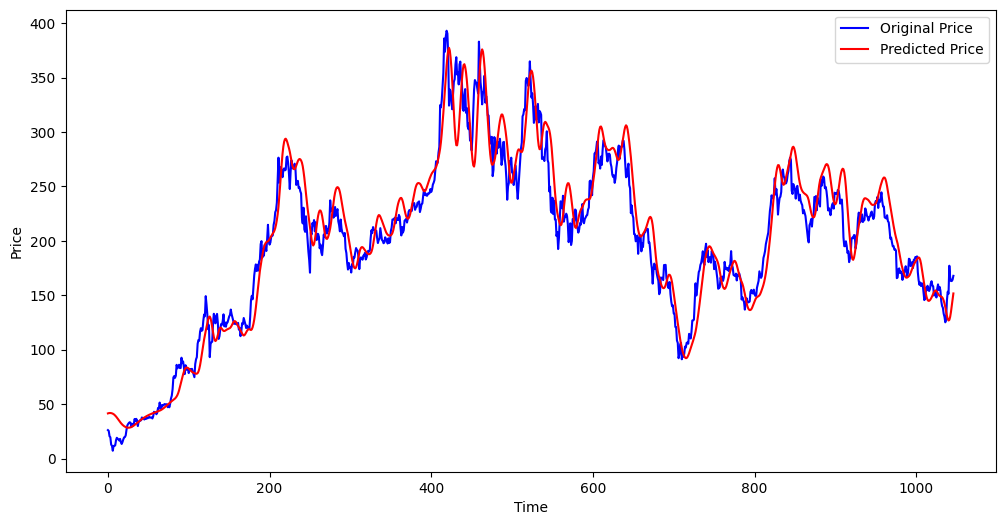

In [157]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
#